## Simulate Dynamic Systems in Python

A step response is a common evaluation of the dynamics of a simulated system. A linear time invariant (LTI) system can be described equivalently as a transfer function, a state space model, or solved numerically with and ODE integrator. This tutorial shows how to simulate a first and second order system in Python.

### First Order System Simulation

Consider a first order differential equation with constants $K_p=3$ and $\tau_p=2$, input $u$, and output response $y$.

$\tau_p \frac{dy}{dt} = -y + K_p u$

Three methods to represent this differential equation is as a (1) transfer function, (2) state space model, and (3) semi-explicit differential equation. Source code is included below to simulate a step response in these three forms.

1. Transfer Function

$\frac{Y(s)}{U(s)} = \frac{K_p}{\tau_p \,s + 1}$

2. State Space Model

$\dot x = A x + B u$

$y = C x + D u$

$A = -\frac{1}{\tau_p} \quad B = \frac{K_p}{\tau_p} \quad C=1 \quad D=0$

3. Differential Equation

$\frac{dy}{dt} = -\frac{1}{\tau_p} y + \frac{K_p}{\tau_p} u$

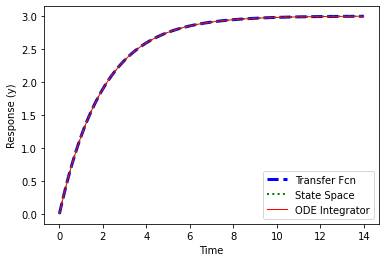

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Simulate taup * dy/dt = -y + K*u
Kp = 3.0
taup = 2.0

# (1) Transfer Function
num = [Kp]
den = [taup,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

# (2) State Space
A = -1.0/taup
B = Kp/taup
C = 1.0
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

# (3) ODE Integrator
def model3(y,t):
    u = 1
    return (-y + Kp * u)/taup
t3 = np.linspace(0,14,100)
y3 = odeint(model3,0,t3)

plt.figure(1)
plt.plot(t1,y1,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2,'g:',linewidth=2,label='State Space')
plt.plot(t3,y3,'r-',linewidth=1,label='ODE Integrator')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.show()

### Second Order System Simulation

1. Laplace Domain, Transfer Function

$\frac{Y(s)}{U(s)} = \frac{K_p}{\tau_s^2 s^2 + 2 \zeta \tau_s s + 1}e^{-\theta_p s}$

2. State Space Form

$\begin{bmatrix}\dot x_1\\\dot x_2\end{bmatrix} = \begin{bmatrix}0&1\\-\frac{1}{\tau_s^2}&-\frac{2 \zeta}{\tau_s}\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} + \begin{bmatrix}0\\\frac{K_p}{\tau_{s}^2}\end{bmatrix} u\left(t-\theta_p\right)$

$y = \begin{bmatrix}1 & 0\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} + \begin{bmatrix}0\end{bmatrix} u$

3. Second Order Differential Equation

$\tau_s^2 \frac{d^2y}{dt^2} + 2 \zeta \tau_s \frac{dy}{dt} + y = K_p \, u\left(t-\theta_p \right)$

* $K_p    = 2.0$  # gain
* $\tau   = 1.0$  # time constant
* $\zeta  = 0.25$ # damping factor
* $\theta = 0.0$  # no time delay

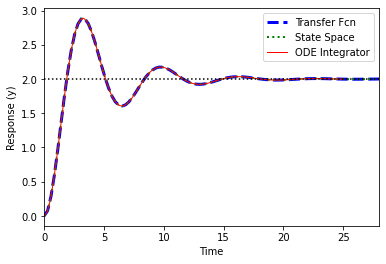

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# tau * dy2/dt2 + 2*zeta*tau*dy/dt + y = Kp*u
Kp = 2.0    # gain
tau = 1.0   # time constant
zeta = 0.25 # damping factor
theta = 0.0 # no time delay
du = 1.0    # change in u

# (1) Transfer Function
num = [Kp]
den = [tau**2,2*zeta*tau,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

# (2) State Space
A = [[0.0,1.0],[-1.0/tau**2,-2.0*zeta/tau]]
B = [[0.0],[Kp/tau**2]]
C = [1.0,0.0]
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

# (3) ODE Integrator
def model3(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*tau*dydt - y + Kp*du)/tau**2
    return [dydt,dy2dt2]
t3 = np.linspace(0,25,100)
x3 = odeint(model3,[0,0],t3)
y3 = x3[:,0]

plt.figure(1)
plt.plot(t1,y1*du,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2*du,'g:',linewidth=2,label='State Space')
plt.plot(t3,y3,'r-',linewidth=1,label='ODE Integrator')
y_ss = Kp * du
plt.plot([0,max(t1)],[y_ss,y_ss],'k:')
plt.xlim([0,max(t1)])
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.savefig('2nd_order.png')
plt.show()

### Higher Order Simulation

A simple higher order simulation is the combination of $n$ first order equations. The value of the time constant is $10/n$ in this example. The first equation is a first order differential expression.

$\tau \frac{dy_1}{dt} = -y_1 + 1$

Additional equations are also first order differential expressions for $i = 2\ldots n$.

$\tau \frac{dy_i}{dt} = -y_i + y_{i-1}$

See [Dynamic Simulation in Python](https://apmonitor.com/pdc/index.php/Main/ModelSimulation) for solution.

### Distillation Exercise

Over 40,000 distillation columns in the U.S. consume 40-60% of the total energy in the petrochemical industry and 6% of the total U.S. energy usage. Reducing distillation energy usage would have a major impact on energy independence, greenhouse gas emissions, and give a competitive advantage to any manufacturer that is better able to implement improvements.

The objective of this exercise is to maintain an overhead mole fraction for the light component in a binary distillation column that separates cyclohexane and n-heptane. The nominal steady state for the column is a reflux ratio at 3.0 with an allowable range from 1.0 to 10.0. This reflux ratio produces a cyclohexane product with a purity of 0.935 (mole fraction), but the target composition is 0.970 with an allowable range of 0.960 to 0.980. The objective is to design a PID controller to meet this target value and stay within the specified product range.

See [Distillation Control](https://apmonitor.com/pdc/index.php/Main/DistillationControl) for full problem statement and solution.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython import display

# define model
def distill(x,t,rr,Feed,x_Feed):
    # Inputs (3):
    # Reflux ratio is the Manipulated variable
    # Reflux Ratio (L/D)
    #rr = p(1)

    # Disturbance variables (DV)
    # Feed Flowrate (mol/min)
    #Feed = p(2)

    # Mole Fraction of Feed
    #x_Feed = p(3)

    # States (32):
    # x(0) - Reflux Drum Liquid Mole Fraction of Component A
    # x(1) - Tray 1 - Liquid Mole Fraction of Component A
    # .
    # .
    # .
    # x(16) - Tray 16 - Liquid Mole Fraction of Component A (Feed)
    # .
    # .
    # .
    # x(30) - Tray 30 - Liquid Mole Fraction of Component A
    # x(31) - Reboiler Liquid Mole Fraction of Component A

    # Parameters
    # Distillate Flowrate (mol/min)
    D=0.5*Feed
    # Flowrate of the Liquid in the Rectification Section (mol/min)
    L=rr*D
    # Vapor Flowrate in the Column (mol/min)
    V=L+D
    # Flowrate of the Liquid in the Stripping Section (mol/min)
    FL=Feed+L
    # Relative Volatility = (yA/xA)/(yB/xB) = KA/KB = alpha(A,B)
    vol=1.6
    # Total Molar Holdup in the Condenser
    atray=0.25
    # Total Molar Holdup on each Tray
    acond=0.5
    # Total Molar Holdup in the Reboiler
    areb=1.0
    # Vapor Mole Fractions of Component A
    # From the equilibrium assumption and mole balances
    # 1) vol = (yA/xA) / (yB/xB)
    # 2) xA + xB = 1
    # 3) yA + yB = 1
    y = np.empty(len(x))
    for i in range(32):
        y[i] = x[i] * vol/(1.0+(vol-1.0)*x[i])

    # Compute xdot
    xdot = np.empty(len(x))
    xdot[0] = 1/acond*V*(y[1]-x[0])
    for i in range(1,16):
        xdot[i] = 1.0/atray*(L*(x[i-1]-x[i])-V*(y[i]-y[i+1]))
    xdot[16] = 1/atray*(Feed*x_Feed+L*x[15]-FL*x[16]-V*(y[16]-y[17]))
    for i in range(17,31):
        xdot[i] = 1.0/atray*(FL*(x[i-1]-x[i])-V*(y[i]-y[i+1]))
    xdot[31] = 1/areb*(FL*x[30]-(Feed-D)*x[31]-V*y[31])
    return xdot

# Steady State Initial Conditions for the 32 states
x_ss =np.array([0.935,0.900,0.862,0.821,0.779,0.738,\
0.698,0.661,0.628,0.599,0.574,0.553,0.535,0.521,    \
0.510,0.501,0.494,0.485,0.474,0.459,0.441,0.419,    \
0.392,0.360,0.324,0.284,0.243,0.201,0.161,0.125,    \
0.092,0.064])
x0 = x_ss

# Steady State Initial Condition
rr_ss = 3.0

# Time Interval (min)
t = np.linspace(0,50,500)

# Store results for plotting
xd = np.ones(len(t)) * x_ss[0]
rr = np.ones(len(t)) * rr_ss
ff = np.ones(len(t))
xf = np.ones(len(t)) * 0.5
sp = np.ones(len(t)) * 0.935

# Step in reflux ratio
rr[10:] = 1.0
rr[180:] = 5.0
rr[360:] = 3.0

plt.figure(figsize=(10,7))
plt.ion()
plt.show()

# Simulate
for i in range(len(t)-1):
    ts = [t[i],t[i+1]]
    y = odeint(distill,x0,ts,args=(rr[i],ff[i],xf[i]))
    xd[i+1] = y[-1][0]
    x0 = y[-1]

    # Plot the results
    display.clear_output(wait=True)
    plt.clf()
    #plt.figure(figsize=(10,7))
    plt.subplot(2,1,1)
    plt.plot(t[0:i+1],rr[0:i+1],'b--',linewidth=3)
    plt.ylabel(r'$RR$')
    plt.legend(['Reflux ratio'],loc='best')

    plt.subplot(2,1,2)
    plt.plot(t[0:i+1],sp[0:i+1],'k.-',linewidth=1)
    plt.plot(t[0:i+1],xd[0:i+1],'r-',linewidth=3)
    plt.ylabel(r'$x_d\;(mol/L)$')
    plt.legend(['Starting composition','Distillate composition'],loc='best')
    plt.xlabel('Time (hr)')

    plt.draw()
    plt.show()

# Construct results and save data file
# Column 1 = time
# Column 2 = reflux ratio
# Column 3 = distillate composition
data = np.vstack((t,rr,xd)) # vertical stack
data = data.T             # transpose data
np.savetxt('data.txt',data,delimiter=',')

plt.savefig('distillation.png')

### TCLab Exercise

**Objective**: Simulate a third-order transfer function, state space, and fifth-order time series model of $T_{C1}$ temperature response to heater $Q_1$.

Higher-order models are better at predicting system dynamics for complex systems. This exercise is to create a third-order transfer function, state space, and a fifth-order time series model as linear representations of step response data. If heater 1 ($Q_1$) controls temperature 2 ($Q_1$), the generated heat first raises the heater 1 temperature ($T_{H1}$). The heat is transferred by convection to heater 2 ($T_{H2}$) and finally reaches temperature 2 sensor ($T_{C2}$) by conduction. This heat transfer pathway suggests a third-order dynamic model, although a higher-order model may improve the fit even further.

See [TCLab Higher Order](https://apmonitor.com/pdc/index.php/Main/TCLabHigherOrder) for problem statement and solution details.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gekko import GEKKO
import tclab
import time
from scipy import signal

# Import data
try:
    # try to read local data file first
    filename = 'data.csv'
    data = pd.read_csv(filename)
except:
    filename = 'http://apmonitor.com/pdc/uploads/Main/tclab_data3.txt'
# read either local file or web file
data = pd.read_csv(filename)

U = 4.7052403301
Us = 15.45761703
alpha1 = 0.012321367852
alpha2 = 0.005
tau = 20.298826743
Ta = 293.15
mass = 0.004
Cp = 500.0
A = 0.001
As = 0.0002
eps = 0.9
sigma = 5.67e-08

Am = np.zeros((3,3))
Bm = np.zeros((3,1))
Cm = np.zeros((1,3))
Dm = np.zeros((1,1))

T0 = Ta
c1 = U*A
c2 = 4*eps*sigma*A*T0**3
c3 = Us*As
c4 = 4*eps*sigma*As*T0**3
c5 = mass*Cp
c6 = 1/tau

Am[0,0] = -(c1+c2+c3+c4)/c5
Am[0,1] = (c3+c4)/c5

Am[1,0] = (c3+c4)/c5
Am[1,1] = -(c1+c2+c3+c4)/c5

Am[2,1] = c6
Am[2,2] = -c6

Bm[0,0] = alpha1/c5

Cm[0,2] = 1

# state space simulation
ss = GEKKO(remote=False)
x,y,u = ss.state_space(Am,Bm,Cm,D=None)
u[0].value = data['Q1'].values
ss.time = data['Time'].values
ss.options.IMODE = 7
ss.solve(disp=False)

# state space simulation with scipy
sys = signal.StateSpace(Am,Bm,Cm,Dm)
tsys = data['Time'].values
Qsys = data['Q1'].values.T
tsys,ysys,xsys = signal.lsim(sys,Qsys,tsys)

# print linearized models
print('State Space Model')
print(sys)

print('Transfer Function Model')
tf=sys.to_tf()
print(tf)

# Time series model
ts = GEKKO(remote=False)
tt = data['Time'].values
tu = data['Q1'].values
ty = data['T2'].values
na = 5 # output coefficients
nb = 5 # input coefficients
print('Identify time series model')
# diaglevel = 1 option to see solver output
yp,p,K = ts.sysid(tt,tu,ty,na,nb,pred='model',objf=1000,diaglevel=0)

# Create plot
plt.figure(figsize=(10,7))
ax=plt.subplot(2,1,1)
ax.grid()
plt.plot(data['Time'],data['T2'],'b.',label=r'$T_2$ measured')
plt.plot(ss.time,np.array(y[0].value)+data['T2'][0],color='purple',linestyle=':',\
         linewidth=2,label=r'$T_2$ state space')
plt.plot(tt,yp,'g--',\
         linewidth=2,label=r'$T_2$ time series')
plt.ylabel(r'T ($^oC$)')
plt.legend(loc=2)
ax=plt.subplot(2,1,2)
ax.grid()
plt.plot(data['Time'],data['Q1'],'r-',\
         linewidth=3,label=r'$Q_1$')
plt.ylabel('Heater (%)')
plt.xlabel('Time (sec)')
plt.legend(loc='best')
plt.savefig('tclab_higher_order.png')
plt.show()